# Projeto Data Mining

Neste notebook será apresentada a exploração de dados em cima da base de dados Horse.csv, sugerida pela proferssora da Disciplina Manoela Kofner.

<img src="https://github.com/thiago-umbelino/images/blob/main/DM/horse_colic.jpg?raw=true" />

## Cólica de Cavalo

O problema proposto é se basea em dados de diagnósticos anteriores de cavalos e com base nesses dados será proposto um modelo de machine learning para a previsão de sobrevivência de um animal de de acordo com seu quadro.

O dataset fornecido possui 26 features, sem contar o target, em uma mistura de dados categóricos, contínuos e dentro desse universo muitos dados fatantes, o que desafia o grupo de estudo a idealizar incontáveis formas de aproximação ao conjunto de dados, mas motivos práticos nesse contexto foi adotado a forma mais direta possível para se chegar um resultado aceitável.

## Lendo os dados e entendendo o Dataset

In [3]:
# importando libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import random

seed = 1
random.seed(seed)
np.random.seed(seed)

In [4]:
# lendo os dados de treino

path = 'horse.csv'

horse_df = pd.read_csv(path)
horse_df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [5]:
horse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [6]:
# lendo dados de teste

test_path = 'horseTest.csv'

horse_test_df = pd.read_csv(test_path)
horse_test_df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,1,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no
1,no,adult,2,39.1,72.0,52.0,warm,NaN,bright_pink,less_3_sec,...,50.0,7.8,NaN,NaN,lived,yes,2111,0,0,no
2,yes,adult,3,37.2,42.0,12.0,warm,normal,normal_pink,less_3_sec,...,NaN,7.0,NaN,NaN,lived,no,4124,0,0,no
3,no,young,4,38.0,92.0,28.0,normal,normal,bright_pink,less_3_sec,...,37.0,6.1,clear,NaN,died,no,0,0,0,yes
4,yes,adult,5,37.6,64.0,21.0,normal,normal,bright_pink,less_3_sec,...,40.0,7.0,clear,NaN,lived,yes,4205,0,0,yes


In [7]:
horse_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                89 non-null     object 
 1   age                    89 non-null     object 
 2   hospital_number        89 non-null     int64  
 3   rectal_temp            73 non-null     float64
 4   pulse                  84 non-null     float64
 5   respiratory_rate       73 non-null     float64
 6   temp_of_extremities    76 non-null     object 
 7   peripheral_pulse       70 non-null     object 
 8   mucous_membrane        79 non-null     object 
 9   capillary_refill_time  85 non-null     object 
 10  pain                   77 non-null     object 
 11  peristalsis            79 non-null     object 
 12  abdominal_distention   77 non-null     object 
 13  nasogastric_tube       66 non-null     object 
 14  nasogastric_reflux     61 non-null     object 
 15  nasogast

In [8]:
# verificando missing

horse_df.isna().sum().sort_values(ascending=False)

nasogastric_reflux_ph    246
abdomo_protein           198
abdomo_appearance        165
abdomen                  118
nasogastric_reflux       106
nasogastric_tube         104
rectal_exam_feces        102
peripheral_pulse          69
rectal_temp               60
respiratory_rate          58
temp_of_extremities       56
abdominal_distention      56
pain                      55
mucous_membrane           47
peristalsis               44
total_protein             33
capillary_refill_time     32
packed_cell_volume        29
pulse                     24
lesion_2                   0
surgical_lesion            0
lesion_3                   0
lesion_1                   0
surgery                    0
outcome                    0
age                        0
hospital_number            0
cp_data                    0
dtype: int64

In [9]:
horse_test_df.isna().sum().sort_values(ascending=False)

nasogastric_reflux_ph    75
abdomo_protein           60
abdomo_appearance        44
abdomen                  35
rectal_exam_feces        34
nasogastric_reflux       28
nasogastric_tube         23
peripheral_pulse         19
rectal_temp              16
respiratory_rate         16
temp_of_extremities      13
pain                     12
abdominal_distention     12
total_protein            10
peristalsis              10
mucous_membrane          10
packed_cell_volume        7
pulse                     5
capillary_refill_time     4
lesion_2                  0
surgical_lesion           0
lesion_3                  0
lesion_1                  0
surgery                   0
outcome                   0
age                       0
hospital_number           0
cp_data                   0
dtype: int64

<AxesSubplot:>

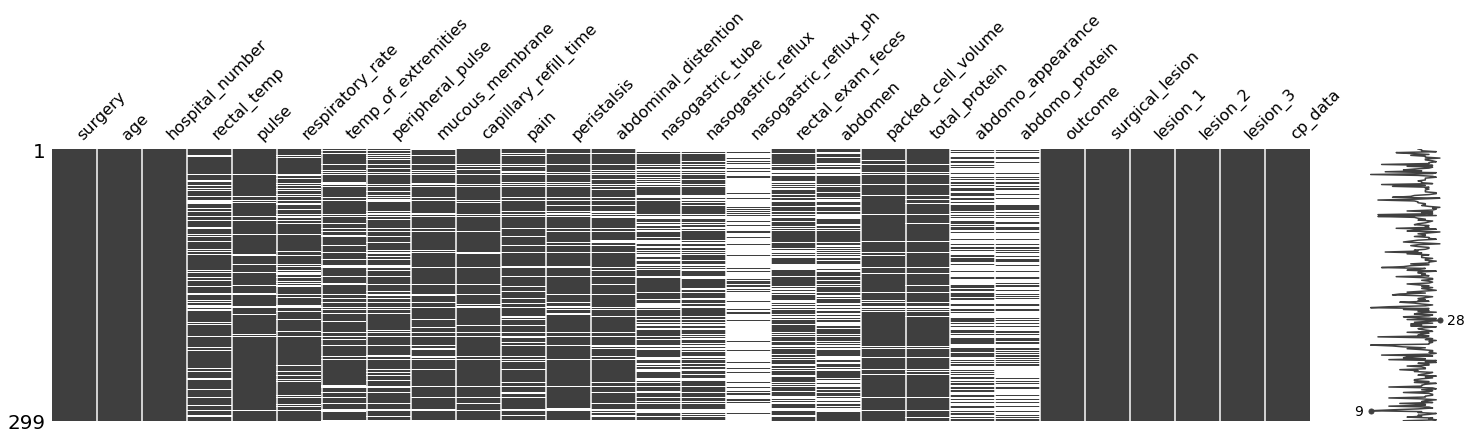

In [10]:
# visualizando missing

msno.matrix(horse_df, figsize=(25,5))

In [11]:
# Varificando porcentagens de missing por coluna 

percent_missing = horse_df.apply(lambda x: x.isnull().sum() * 100 / len(horse_df), axis=0).sort_values(ascending=False)
#df_missing = pd.DataFrame({'column_name': horse_df.columns, 'percent_missing': percent_missing})
df_missing = pd.DataFrame({'percent_missing': percent_missing})
df_missing.head(29)

,percent_missing
nasogastric_reflux_ph,82.274247
abdomo_protein,66.220736
abdomo_appearance,55.183946
abdomen,39.464883
nasogastric_reflux,35.451505
nasogastric_tube,34.782609
rectal_exam_feces,34.113712
peripheral_pulse,23.076923
rectal_temp,20.066890
respiratory_rate,19.397993


In [12]:
# Os atributos com mais de 20% de missing serão descartados.

to_delete = df_missing[0:8].index.values
to_delete

array(['nasogastric_reflux_ph', 'abdomo_protein', 'abdomo_appearance',
       'abdomen', 'nasogastric_reflux', 'nasogastric_tube',
       'rectal_exam_feces', 'peripheral_pulse'], dtype=object)

Verificando erros de entrada nos dados categóricos

In [13]:
horse_df['surgery'].value_counts()

yes    180
no     119
Name: surgery, dtype: int64

In [14]:
horse_df['age'].value_counts()

adult    275
young     24
Name: age, dtype: int64

In [15]:
horse_df['temp_of_extremities'].value_counts()

cool      108
normal     78
warm       30
cold       27
Name: temp_of_extremities, dtype: int64

In [16]:
horse_df['peripheral_pulse'].value_counts()

normal       114
reduced      103
absent         8
increased      5
Name: peripheral_pulse, dtype: int64

In [17]:
horse_df['mucous_membrane'].value_counts()

normal_pink      79
pale_pink        57
pale_cyanotic    41
bright_pink      30
bright_red       25
dark_cyanotic    20
Name: mucous_membrane, dtype: int64

In [18]:
horse_df['capillary_refill_time'].value_counts()

less_3_sec    187
more_3_sec     78
3               2
Name: capillary_refill_time, dtype: int64

In [19]:
horse_df['pain'].value_counts()

mild_pain       67
depressed       59
extreme_pain    42
severe_pain     38
alert           38
Name: pain, dtype: int64

In [20]:
horse_df['peristalsis'].value_counts()

hypomotile     127
absent          73
hypermotile     39
normal          16
Name: peristalsis, dtype: int64

In [21]:
horse_df['abdominal_distention'].value_counts()

none        75
slight      65
moderate    65
severe      38
Name: abdominal_distention, dtype: int64

In [22]:
horse_df['nasogastric_tube'].value_counts()

slight         101
none            71
significant     23
Name: nasogastric_tube, dtype: int64

In [23]:
horse_df['nasogastric_reflux'].value_counts()

none            119
more_1_liter     39
less_1_liter     35
Name: nasogastric_reflux, dtype: int64

In [24]:
horse_df['rectal_exam_feces'].value_counts()

absent       79
normal       57
decreased    48
increased    13
Name: rectal_exam_feces, dtype: int64

In [25]:
horse_df['abdomen'].value_counts()

distend_large    78
distend_small    43
normal           28
other            19
firm             13
Name: abdomen, dtype: int64

In [26]:
horse_df['abdomo_appearance'].value_counts()

cloudy           47
serosanguious    46
clear            41
Name: abdomo_appearance, dtype: int64

In [27]:
horse_df['outcome'].value_counts()

lived         178
died           77
euthanized     44
Name: outcome, dtype: int64

In [28]:
horse_df['surgical_lesion'].value_counts()

yes    190
no     109
Name: surgical_lesion, dtype: int64

In [29]:
horse_df['cp_data'].value_counts()

no     200
yes     99
Name: cp_data, dtype: int64

Não foi detectado nenhum erro de inputação nos dados categóricos

## Preenchendo Missing

In [30]:
# Criando Filtros para verificar linhas com missing

na_filter = horse_df.isna()
test_na_filter = horse_test_df.isna()

In [31]:
# Verificando média entre as categorias de temperatura

for i in horse_df['temp_of_extremities'].unique():
    if pd.notna(i):
        media = horse_df[horse_df['temp_of_extremities'] == i].rectal_temp.mean(skipna=True).round(2)
        print("Média {0}: {1}".format(i, media))

Média cool: 38.19
Média normal: 38.13
Média cold: 38.46
Média warm: 38.2


In [32]:
# Na descrição do dataset uma alta temperatura nas extremidades são correlacionadas com temperaturas retais altas
# Nesse contexto será aplicada a média da temperatura retal para cada media categórica


for i in horse_df['temp_of_extremities'].unique():
    if pd.notna(i):
        temp_var = horse_df[horse_df['temp_of_extremities'] == i].rectal_temp.mean(skipna=True).round(2)
        horse_df.loc[((na_filter['rectal_temp']) & (horse_df['temp_of_extremities'] == i)), 'rectal_temp'] = temp_var
        horse_test_df.loc[((test_na_filter['rectal_temp']) & (horse_test_df['temp_of_extremities'] == i)), 'rectal_temp'] = temp_var

In [33]:
# Atualizando filtro

na_filter = horse_df.isna()
test_na_filter = horse_test_df.isna()

Dos 14 registros que sobraram da temperatura retal será aplicada a média de cada categoria do outcome

In [34]:
for i in horse_df['outcome'].unique():
        media = horse_df[horse_df['outcome'] == i].rectal_temp.mean(skipna=True).round(2)
        print("Média {0}: {1}".format(i, media))

Média died: 38.19
Média euthanized: 38.1
Média lived: 38.19


In [35]:
for i in horse_df['outcome'].unique():
    temp_var = horse_df[horse_df['outcome'] == i].rectal_temp.mean(skipna=True).round(2)
    horse_df.loc[((na_filter['rectal_temp']) & (horse_df['outcome'] == i)), 'rectal_temp'] = temp_var
    horse_test_df.loc[((test_na_filter['rectal_temp']) & (horse_test_df['outcome'] == i)), 'rectal_temp'] = temp_var

In [36]:
# Atualizando filtro

na_filter = horse_df.isna()
test_na_filter = horse_test_df.isna()

In [37]:
# Deletando Colunas com muitos missings

horse_df.drop(to_delete, axis=1, inplace=True)
horse_test_df.drop(to_delete, axis=1, inplace=True)

horse_df.isna().sum().sort_values(ascending=False)

respiratory_rate         58
temp_of_extremities      56
abdominal_distention     56
pain                     55
mucous_membrane          47
peristalsis              44
total_protein            33
capillary_refill_time    32
packed_cell_volume       29
pulse                    24
surgical_lesion           0
lesion_3                  0
lesion_2                  0
lesion_1                  0
surgery                   0
outcome                   0
age                       0
rectal_temp               0
hospital_number           0
cp_data                   0
dtype: int64

In [38]:
for i in horse_df['age'].unique():
        media = horse_df[horse_df['age'] == i].pulse.mean(skipna=True).round(0)
        print("Média {0}: {1}".format(i, media))

Média adult: 68.0
Média young: 123.0


In [39]:
# Aplicando médias de idades diferentes para pulse

for i in horse_df['age'].unique():
    temp_var = horse_df[horse_df['age'] == i].pulse.mean(skipna=True).round(0)
    horse_df.loc[((na_filter['pulse']) & (horse_df['age'] == i)), 'pulse'] = temp_var
    horse_test_df.loc[((test_na_filter['pulse']) & (horse_test_df['age'] == i)), 'pulse'] = temp_var

In [40]:
for i in horse_df['age'].unique():
        media = horse_df[horse_df['age'] == i].respiratory_rate.mean(skipna=True).round(0)
        print("Média {0}: {1}".format(i, media))

Média adult: 28.0
Média young: 55.0


In [41]:
# Aplicando médias de idades diferentes para taxa respiratória

for i in horse_df['age'].unique():
    temp_var = horse_df[horse_df['age'] == i].respiratory_rate.mean(skipna=True).round(0)
    horse_df.loc[((na_filter['respiratory_rate']) & (horse_df['age'] == i)), 'respiratory_rate'] = temp_var
    horse_test_df.loc[((test_na_filter['respiratory_rate']) & (horse_test_df['age'] == i)), 'respiratory_rate'] = temp_var

In [42]:
# Atualizando filtro

na_filter = horse_df.isna()
test_na_filter = horse_test_df.isna()

In [43]:
# Serão aplicadas as modas das temperaturas nas extremidades para cada outcome

for i in horse_df['outcome'].unique():
    temp_var = horse_df[horse_df['outcome'] == i].temp_of_extremities.mode().values[0]
    horse_df.loc[((na_filter['temp_of_extremities']) & (horse_df['outcome'] == i)), 'temp_of_extremities'] = temp_var
    horse_test_df.loc[((test_na_filter['temp_of_extremities']) & (horse_test_df['outcome'] == i)), 'temp_of_extremities'] = temp_var

In [44]:
# Atualizando filtro

na_filter = horse_df.isna()
test_na_filter = horse_test_df.isna()

In [45]:
# Para membrana mucosa iremos expandir os registros em duas novas colunas

horse_df[['brightness', 'color']] = horse_df['mucous_membrane'].str.split('_', expand=True)
horse_df.drop('mucous_membrane', axis=1, inplace=True)

horse_test_df[['brightness', 'color']] = horse_test_df['mucous_membrane'].str.split('_', expand=True)
horse_test_df.drop('mucous_membrane', axis=1, inplace=True)


In [46]:
# Atualizando filtro

na_filter = horse_df.isna()
test_na_filter = horse_test_df.isna()

In [47]:
for i in horse_df['outcome'].unique():
    temp_var = horse_df[horse_df['outcome'] == i].brightness.mode().values[0]
    horse_df.loc[((na_filter['brightness']) & (horse_df['outcome'] == i)), 'brightness'] = temp_var
    horse_test_df.loc[((test_na_filter['brightness']) & (horse_test_df['outcome'] == i)), 'brightness'] = temp_var

for i in horse_df['outcome'].unique():
    temp_var = horse_df[horse_df['outcome'] == i].color.mode().values[0]
    horse_df.loc[((na_filter['color']) & (horse_df['outcome'] == i)), 'color'] = temp_var
    horse_test_df.loc[((test_na_filter['color']) & (horse_test_df['outcome'] == i)), 'color'] = temp_var

In [48]:
# Atualizando filtro

na_filter = horse_df.isna()
test_na_filter = horse_test_df.isna()

In [49]:
for i in horse_df['outcome'].unique():
    temp_var = horse_df[horse_df['outcome'] == i].capillary_refill_time.mode().values[0]
    horse_df.loc[((na_filter['capillary_refill_time']) & (horse_df['outcome'] == i)), 'capillary_refill_time'] = temp_var
    horse_test_df.loc[((test_na_filter['capillary_refill_time']) & (horse_test_df['outcome'] == i)), 'capillary_refill_time'] = temp_var

In [50]:
# Atualizando filtro

na_filter = horse_df.isna()
test_na_filter = horse_test_df.isna()

In [51]:
for i in horse_df['outcome'].unique():
    temp_var = horse_df[horse_df['outcome'] == i].pain.mode().values[0]
    horse_df.loc[((na_filter['pain']) & (horse_df['outcome'] == i)), 'pain'] = temp_var
    horse_test_df.loc[((test_na_filter['pain']) & (horse_test_df['outcome'] == i)), 'pain'] = temp_var

In [52]:
# Atualizando filtro

na_filter = horse_df.isna()
test_na_filter = horse_test_df.isna()

In [53]:
for i in horse_df['outcome'].unique():
    temp_var = horse_df[horse_df['outcome'] == i].peristalsis.mode().values[0]
    horse_df.loc[((na_filter['peristalsis']) & (horse_df['outcome'] == i)), 'peristalsis'] = temp_var
    horse_test_df.loc[((test_na_filter['peristalsis']) & (horse_test_df['outcome'] == i)), 'peristalsis'] = temp_var

In [54]:
# Atualizando filtro

na_filter = horse_df.isna()
test_na_filter = horse_test_df.isna()

In [55]:
for i in horse_df['outcome'].unique():
    temp_var = horse_df[horse_df['outcome'] == i].abdominal_distention.mode().values[0]
    horse_df.loc[((na_filter['abdominal_distention']) & (horse_df['outcome'] == i)), 'abdominal_distention'] = temp_var
    horse_test_df.loc[((test_na_filter['abdominal_distention']) & (horse_test_df['outcome'] == i)), 'abdominal_distention'] = temp_var

In [56]:
# Atualizando filtro

na_filter = horse_df.isna()
test_na_filter = horse_test_df.isna()

In [57]:
for i in horse_df['outcome'].unique():
    temp_var = horse_df[horse_df['outcome'] == i].packed_cell_volume.mean().round(0)
    horse_df.loc[((na_filter['packed_cell_volume']) & (horse_df['outcome'] == i)), 'packed_cell_volume'] = temp_var
    horse_test_df.loc[((test_na_filter['packed_cell_volume']) & (horse_test_df['outcome'] == i)), 'packed_cell_volume'] = temp_var

In [58]:
# Atualizando filtro

na_filter = horse_df.isna()
test_na_filter = horse_test_df.isna()

In [59]:
for i in horse_df['outcome'].unique():
    temp_var = horse_df[horse_df['outcome'] == i].total_protein.mean().round(1)
    horse_df.loc[((na_filter['total_protein']) & (horse_df['outcome'] == i)), 'total_protein'] = temp_var
    horse_test_df.loc[((test_na_filter['total_protein']) & (horse_test_df['outcome'] == i)), 'total_protein'] = temp_var

In [60]:
# Atualizando filtro

na_filter = horse_df.isna()
test_na_filter = horse_test_df.isna()

In [61]:
lession_df = horse_df['lesion_1'].astype(str)
lession_df = pd.DataFrame(lession_df)
lession_df.head()

,lesion_1
0,11300
1,2208
2,0
3,2208
4,4300


In [62]:
df_temp5 = lession_df[lession_df['lesion_1'].str.len() == 3].lesion_1.str.split('', expand=True)
df_temp5[4] = '0'
df_temp5.drop([0], axis=1, inplace=True)

lesion_col_names = {
                    df_temp5.columns[0]: 'site',
                    df_temp5.columns[1]: 'type',
                    df_temp5.columns[2]: 'subtype',
                    df_temp5.columns[3]: 'code',
                    }

df_temp5 = df_temp5.rename(columns=lesion_col_names)
df_temp5

,site,type,subtype,code
85,4,0,0,0
132,4,0,0,0
154,4,0,0,0
195,3,0,0,0
233,4,0,0,0
252,4,0,0,0


In [63]:
df_temp4 = lession_df[lession_df['lesion_1'].str.len() == 1]
df_temp4[1] = '0'
df_temp4[2] = '0'
df_temp4[3] = '0'

lesion_col_names = {
                    df_temp4.columns[0]: 'site',
                    df_temp4.columns[1]: 'type',
                    df_temp4.columns[2]: 'subtype',
                    df_temp4.columns[3]: 'code',
                    }

df_temp4 = df_temp4.rename(columns=lesion_col_names)
df_temp4.head()

/var/folders/39/nhpmjqr92_n_phmv38r6nym80000gn/T/ipykernel_2424/729646373.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp4[1] = '0'
/var/folders/39/nhpmjqr92_n_phmv38r6nym80000gn/T/ipykernel_2424/729646373.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp4[2] = '0'
/var/folders/39/nhpmjqr92_n_phmv38r6nym80000gn/T/ipykernel_2424/729646373.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,site,type,subtype,code
2,0,0,0,0
5,0,0,0,0
9,0,0,0,0
13,0,0,0,0
17,0,0,0,0


In [64]:
df_temp3 = pd.DataFrame(lession_df[(lession_df['lesion_1'].str.find('11') != 0) & (lession_df['lesion_1'].str.len() == 5)].lesion_1.str[0:3]).lesion_1.str.split('', expand=True)
df_temp3.drop([0, 4], axis=1, inplace=True)
df_temp3 = df_temp3.merge(pd.DataFrame(lession_df[(lession_df['lesion_1'].str.find('11') != 0) & (lession_df['lesion_1'].str.len() == 5)].lesion_1.str[3:5]), left_index=True, right_index=True)

lesion_col_names = {
                    df_temp3.columns[0]: 'site',
                    df_temp3.columns[1]: 'type',
                    df_temp3.columns[2]: 'subtype',
                    df_temp3.columns[3]: 'code',
                    }

df_temp3 = df_temp3.rename(columns=lesion_col_names)
df_temp3.loc[262, 'code'] = '8'                     # ajustando erro de digitação
df_temp3

,site,type,subtype,code
105,3,1,1,10
126,3,1,1,10
185,2,1,1,10
188,3,1,1,10
202,3,1,1,10
244,4,1,1,10
262,1,2,2,8
268,3,1,1,10
284,3,1,1,10
291,3,1,1,10


In [65]:
df_temp = pd.DataFrame(lession_df[(lession_df['lesion_1'].str.find('11') == 0) & (lession_df['lesion_1'].str.len() == 5)].lesion_1.str[0:2])
df_temp = df_temp.merge(pd.DataFrame(lession_df[(lession_df['lesion_1'].str.find('11') == 0) & (lession_df['lesion_1'].str.len() == 5)].lesion_1.str[2:5]).lesion_1.str.split('', expand=True),left_index=True, right_index=True)
df_temp.drop([0, 4], axis=1, inplace=True)

lesion_col_names = {
                    df_temp.columns[0]: 'site',
                    df_temp.columns[1]: 'type',
                    df_temp.columns[2]: 'subtype',
                    df_temp.columns[3]: 'code',
                    }

df_temp = df_temp.rename(columns=lesion_col_names)
df_temp

,site,type,subtype,code
0,11,3,0,0
74,11,1,2,4
258,11,4,0,0
273,11,1,2,4


In [66]:
df_temp2 = lession_df[lession_df['lesion_1'].str.len() == 4].lesion_1.str.split('', expand=True)
df_temp2.drop([0, 5], axis=1, inplace=True)

lesion_col_names = {
                    df_temp2.columns[0]: 'site',
                    df_temp2.columns[1]: 'type',
                    df_temp2.columns[2]: 'subtype',
                    df_temp2.columns[3]: 'code',
                    }

df_temp2 = df_temp2.rename(columns=lesion_col_names)
df_temp2

,site,type,subtype,code
1,2,2,0,8
3,2,2,0,8
4,4,3,0,0
6,3,1,2,4
7,2,2,0,8
...,...,...,...,...
294,3,2,0,5
295,2,2,0,8
296,3,2,0,5
297,2,2,0,8


In [67]:
df_decoded_lesion = pd.concat([df_temp, df_temp2, df_temp3, df_temp4, df_temp5], ignore_index=False).sort_index()
df_decoded_lesion.head()

,site,type,subtype,code
0,11,3,0,0
1,2,2,0,8
2,0,0,0,0
3,2,2,0,8
4,4,3,0,0


In [68]:
df_data = horse_df.merge(df_decoded_lesion, left_index=True, right_index=True)
df_data.drop(['lesion_1', 'lesion_2', 'lesion_3'], axis=1, inplace=True)
df_data['site'] = df_data['site'].astype(int)
df_data['type'] = df_data['type'].astype(int)
df_data['subtype'] = df_data['subtype'].astype(int)
df_data['code'] = df_data['code'].astype(int)
df_data.head(10)

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,capillary_refill_time,pain,peristalsis,...,total_protein,outcome,surgical_lesion,cp_data,brightness,color,site,type,subtype,code
0,no,adult,530101,38.50,66.0,28.0,cool,more_3_sec,extreme_pain,absent,...,8.4,died,no,no,pale,pink,11,3,0,0
1,yes,adult,534817,39.20,88.0,20.0,cool,less_3_sec,mild_pain,absent,...,85.0,euthanized,no,no,pale,cyanotic,2,2,0,8
2,no,adult,530334,38.30,40.0,24.0,normal,less_3_sec,mild_pain,hypomotile,...,6.7,lived,no,yes,pale,pink,0,0,0,0
3,yes,young,5290409,39.10,164.0,84.0,cold,more_3_sec,depressed,absent,...,7.2,died,yes,yes,dark,cyanotic,2,2,0,8
4,no,adult,530255,37.30,104.0,35.0,cool,more_3_sec,extreme_pain,hypomotile,...,7.4,died,no,no,dark,cyanotic,4,3,0,0
5,no,adult,528355,38.20,68.0,28.0,warm,less_3_sec,depressed,hypomotile,...,27.3,lived,no,no,pale,pink,0,0,0,0
6,yes,adult,526802,37.90,48.0,16.0,normal,less_3_sec,mild_pain,hypomotile,...,7.0,lived,yes,no,normal,pink,3,1,2,4
7,yes,adult,529607,38.19,60.0,28.0,cool,less_3_sec,extreme_pain,absent,...,8.3,died,yes,no,pale,pink,2,2,0,8
8,no,adult,530051,38.19,80.0,36.0,cool,less_3_sec,severe_pain,absent,...,6.2,euthanized,yes,no,pale,pink,3,2,0,5
9,no,young,5299629,38.30,90.0,55.0,normal,less_3_sec,extreme_pain,hypomotile,...,6.2,lived,no,yes,normal,pink,0,0,0,0


In [69]:
df_data.to_csv('cleaned_horse.csv')

In [70]:
# expandindo os dados de treinamento

lession_df = horse_test_df['lesion_1'].astype(str)
lession_df = pd.DataFrame(lession_df)
lession_df.head()

,lesion_1
0,4300
1,2111
2,4124
3,0
4,4205


In [71]:
df_temp5 = lession_df[lession_df['lesion_1'].str.len() == 3].lesion_1.str.split('', expand=True)
df_temp5[4] = '0'
df_temp5.drop([0], axis=1, inplace=True)

lesion_col_names = {
                    df_temp5.columns[0]: 'site',
                    df_temp5.columns[1]: 'type',
                    df_temp5.columns[2]: 'subtype',
                    df_temp5.columns[3]: 'code',
                    }

df_temp5 = df_temp5.rename(columns=lesion_col_names)
df_temp5

,site,type,subtype,code
26,4,0,0,0
39,4,0,0,0
47,4,0,0,0


In [72]:
df_temp4 = lession_df[lession_df['lesion_1'].str.len() == 1]
df_temp4[1] = '0'
df_temp4[2] = '0'
df_temp4[3] = '0'

lesion_col_names = {
                    df_temp4.columns[0]: 'site',
                    df_temp4.columns[1]: 'type',
                    df_temp4.columns[2]: 'subtype',
                    df_temp4.columns[3]: 'code',
                    }

df_temp4 = df_temp4.rename(columns=lesion_col_names)
df_temp4.head()

/var/folders/39/nhpmjqr92_n_phmv38r6nym80000gn/T/ipykernel_2424/729646373.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp4[1] = '0'
/var/folders/39/nhpmjqr92_n_phmv38r6nym80000gn/T/ipykernel_2424/729646373.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp4[2] = '0'
/var/folders/39/nhpmjqr92_n_phmv38r6nym80000gn/T/ipykernel_2424/729646373.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,site,type,subtype,code
3,0,0,0,0
28,0,0,0,0
30,0,0,0,0
31,0,0,0,0
41,0,0,0,0


In [73]:
df_temp3 = pd.DataFrame(lession_df[(lession_df['lesion_1'].str.find('11') != 0) & (lession_df['lesion_1'].str.len() == 5)].lesion_1.str[0:3]).lesion_1.str.split('', expand=True)
df_temp3.drop([0, 4], axis=1, inplace=True)
df_temp3 = df_temp3.merge(pd.DataFrame(lession_df[(lession_df['lesion_1'].str.find('11') != 0) & (lession_df['lesion_1'].str.len() == 5)].lesion_1.str[3:5]), left_index=True, right_index=True)

lesion_col_names = {
                    df_temp3.columns[0]: 'site',
                    df_temp3.columns[1]: 'type',
                    df_temp3.columns[2]: 'subtype',
                    df_temp3.columns[3]: 'code',
                    }

df_temp3 = df_temp3.rename(columns=lesion_col_names)
df_temp3.loc[75, 'code'] = '8'                     # ajustando erro de digitação
df_temp3

,site,type,subtype,code
33,3,1,1,10
57,2,1,1,10
69,4,1,1,10
75,1,2,2,8
82,3,1,1,10
87,3,1,1,10


In [74]:
df_temp = pd.DataFrame(lession_df[(lession_df['lesion_1'].str.find('11') == 0) & (lession_df['lesion_1'].str.len() == 5)].lesion_1.str[0:2])
df_temp = df_temp.merge(pd.DataFrame(lession_df[(lession_df['lesion_1'].str.find('11') == 0) & (lession_df['lesion_1'].str.len() == 5)].lesion_1.str[2:5]).lesion_1.str.split('', expand=True),left_index=True, right_index=True)
df_temp.drop([0, 4], axis=1, inplace=True)

lesion_col_names = {
                    df_temp.columns[0]: 'site',
                    df_temp.columns[1]: 'type',
                    df_temp.columns[2]: 'subtype',
                    df_temp.columns[3]: 'code',
                    }

df_temp = df_temp.rename(columns=lesion_col_names)
df_temp

,site,type,subtype,code
73,11,4,0,0


In [75]:
df_temp2 = lession_df[lession_df['lesion_1'].str.len() == 4].lesion_1.str.split('', expand=True)
df_temp2.drop([0, 5], axis=1, inplace=True)

lesion_col_names = {
                    df_temp2.columns[0]: 'site',
                    df_temp2.columns[1]: 'type',
                    df_temp2.columns[2]: 'subtype',
                    df_temp2.columns[3]: 'code',
                    }

df_temp2 = df_temp2.rename(columns=lesion_col_names)
df_temp2

,site,type,subtype,code
0,4,3,0,0
1,2,1,1,1
2,4,1,2,4
4,4,2,0,5
5,3,1,1,1
...,...,...,...,...
81,3,1,1,1
83,2,2,0,5
84,2,1,2,4
86,7,1,1,1


In [76]:
df_decoded_lesion = pd.concat([df_temp, df_temp2, df_temp3, df_temp4, df_temp5], ignore_index=False).sort_index()
df_decoded_lesion.head()

,site,type,subtype,code
0,4,3,0,0
1,2,1,1,1
2,4,1,2,4
3,0,0,0,0
4,4,2,0,5


In [77]:
horse_test_df = horse_test_df.merge(df_decoded_lesion, left_index=True, right_index=True)
horse_test_df.drop(['lesion_1', 'lesion_2', 'lesion_3'], axis=1, inplace=True)
horse_test_df['site'] = horse_test_df['site'].astype(int)
horse_test_df['type'] = horse_test_df['type'].astype(int)
horse_test_df['subtype'] = horse_test_df['subtype'].astype(int)
horse_test_df['code'] = horse_test_df['code'].astype(int)
horse_test_df.head(10)

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,capillary_refill_time,pain,peristalsis,...,total_protein,outcome,surgical_lesion,cp_data,brightness,color,site,type,subtype,code
0,no,adult,1,37.30,104.0,35.0,cool,more_3_sec,extreme_pain,hypomotile,...,7.4,died,no,no,dark,cyanotic,4,3,0,0
1,no,adult,2,39.10,72.0,52.0,warm,less_3_sec,depressed,hypermotile,...,7.8,lived,yes,no,bright,pink,2,1,1,1
2,yes,adult,3,37.20,42.0,12.0,warm,less_3_sec,mild_pain,hypomotile,...,7.0,lived,no,no,normal,pink,4,1,2,4
3,no,young,4,38.00,92.0,28.0,normal,less_3_sec,alert,hypomotile,...,6.1,died,no,yes,bright,pink,0,0,0,0
4,yes,adult,5,37.60,64.0,21.0,normal,less_3_sec,depressed,hypomotile,...,7.0,lived,yes,yes,bright,pink,4,2,0,5
5,yes,adult,6,38.60,42.0,34.0,warm,3,depressed,hypomotile,...,7.2,lived,yes,no,pale,cyanotic,3,1,1,1
6,yes,young,7,38.30,130.0,60.0,normal,less_3_sec,depressed,absent,...,70.0,lived,yes,no,normal,pink,3,1,1,1
7,yes,adult,8,37.80,48.0,12.0,cool,less_3_sec,mild_pain,hypomotile,...,5.5,lived,no,yes,normal,pink,4,1,2,2
8,yes,adult,9,38.19,100.0,30.0,cool,more_3_sec,extreme_pain,absent,...,6.6,lived,yes,no,pale,cyanotic,1,1,2,4
9,no,adult,10,38.46,104.0,24.0,cold,more_3_sec,severe_pain,absent,...,8.4,euthanized,yes,no,pale,pink,7,1,1,1


In [78]:
horse_test_df.to_csv('cleaned_horse_test.csv')

In [79]:
horse_df.isna().sum()

surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
packed_cell_volume       0
total_protein            0
outcome                  0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
brightness               0
color                    0
dtype: int64

## Análise Exploratória

In [80]:
analysis_df = df_data.drop('hospital_number', axis=1)
analysis_df.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,capillary_refill_time,pain,peristalsis,abdominal_distention,...,total_protein,outcome,surgical_lesion,cp_data,brightness,color,site,type,subtype,code
0,no,adult,38.5,66.0,28.0,cool,more_3_sec,extreme_pain,absent,severe,...,8.4,died,no,no,pale,pink,11,3,0,0
1,yes,adult,39.2,88.0,20.0,cool,less_3_sec,mild_pain,absent,slight,...,85.0,euthanized,no,no,pale,cyanotic,2,2,0,8
2,no,adult,38.3,40.0,24.0,normal,less_3_sec,mild_pain,hypomotile,none,...,6.7,lived,no,yes,pale,pink,0,0,0,0
3,yes,young,39.1,164.0,84.0,cold,more_3_sec,depressed,absent,severe,...,7.2,died,yes,yes,dark,cyanotic,2,2,0,8
4,no,adult,37.3,104.0,35.0,cool,more_3_sec,extreme_pain,hypomotile,moderate,...,7.4,died,no,no,dark,cyanotic,4,3,0,0


Verificando a contagem da variável outcome

lived         178
died           77
euthanized     44
Name: outcome, dtype: int64


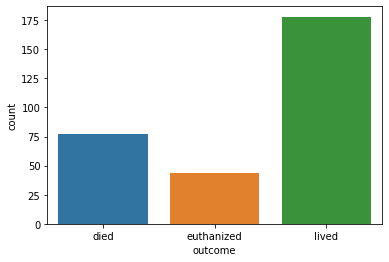

In [81]:
# contagem dos resultados

print(analysis_df.outcome.value_counts())
#plt.figure(figsize=(12,7))
sns.countplot(data=analysis_df, x='outcome')
plt.show()

<AxesSubplot:>

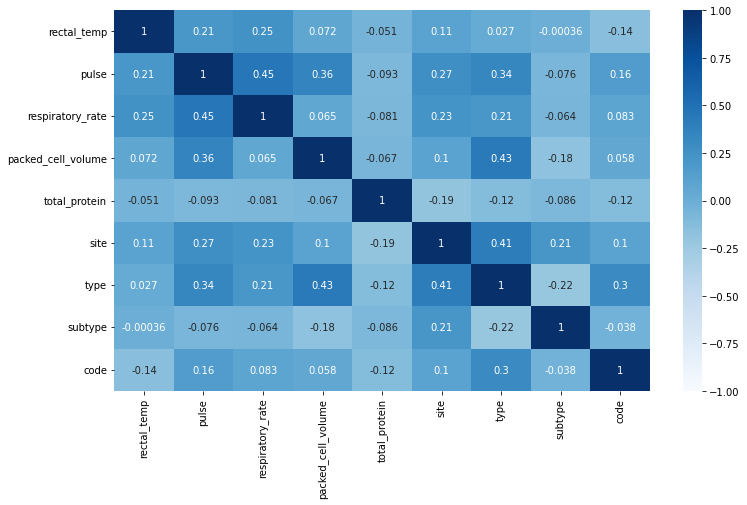

In [82]:
plt.figure(figsize=(12,7))
sns.heatmap(analysis_df.corr(), vmin=-1, vmax=1, annot=True, cmap='Blues')

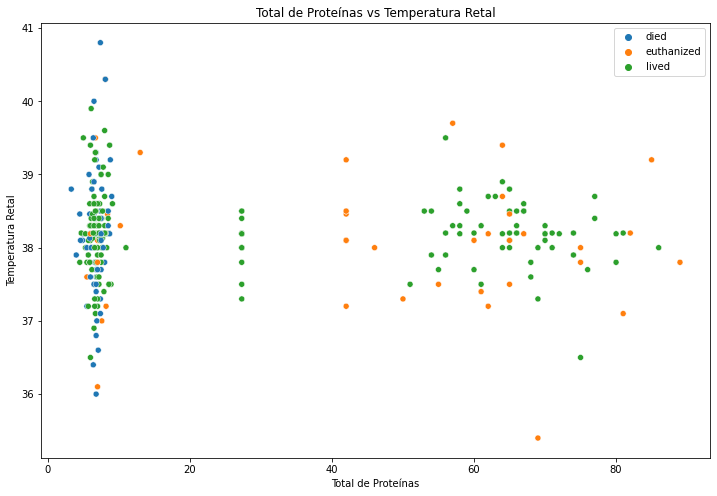

In [83]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=analysis_df, x='total_protein', y='rectal_temp', hue='outcome')
plt.title('Total de Proteínas vs Temperatura Retal')
plt.xlabel('Total de Proteínas')
plt.ylabel('Temperatura Retal')
plt.legend()
plt.show()

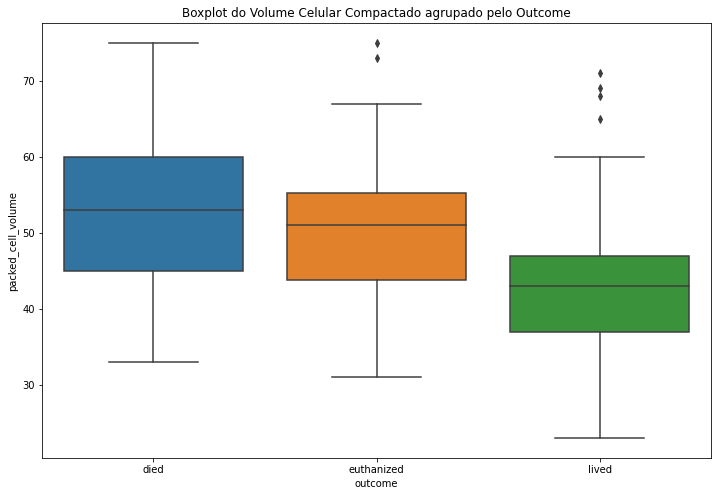

In [84]:
# box plot do volume celular

plt.figure(figsize = (12,8))
ax = sns.boxplot(x='outcome',y='packed_cell_volume',data = analysis_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation= 0)
plt.title('Boxplot do Volume Celular Compactado agrupado pelo Outcome')
plt.show()

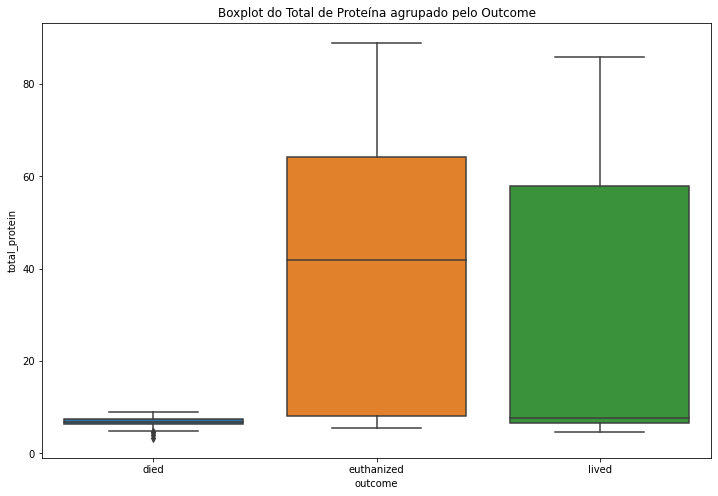

In [85]:
# box plot do total de proteína

plt.figure(figsize = (12,8))
ax = sns.boxplot(x='outcome',y='total_protein',data = analysis_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation= 0)
plt.title('Boxplot do Total de Proteína agrupado pelo Outcome')
plt.show()

In [86]:
site_list = ['none', 'gastrict', 'sm intestine', 'lg colon', 'lg colon and cecum', 'cecum', 'transverse colon', 'retum/descending colon', 'uterus', 'bladder', 'all intestinal sites']

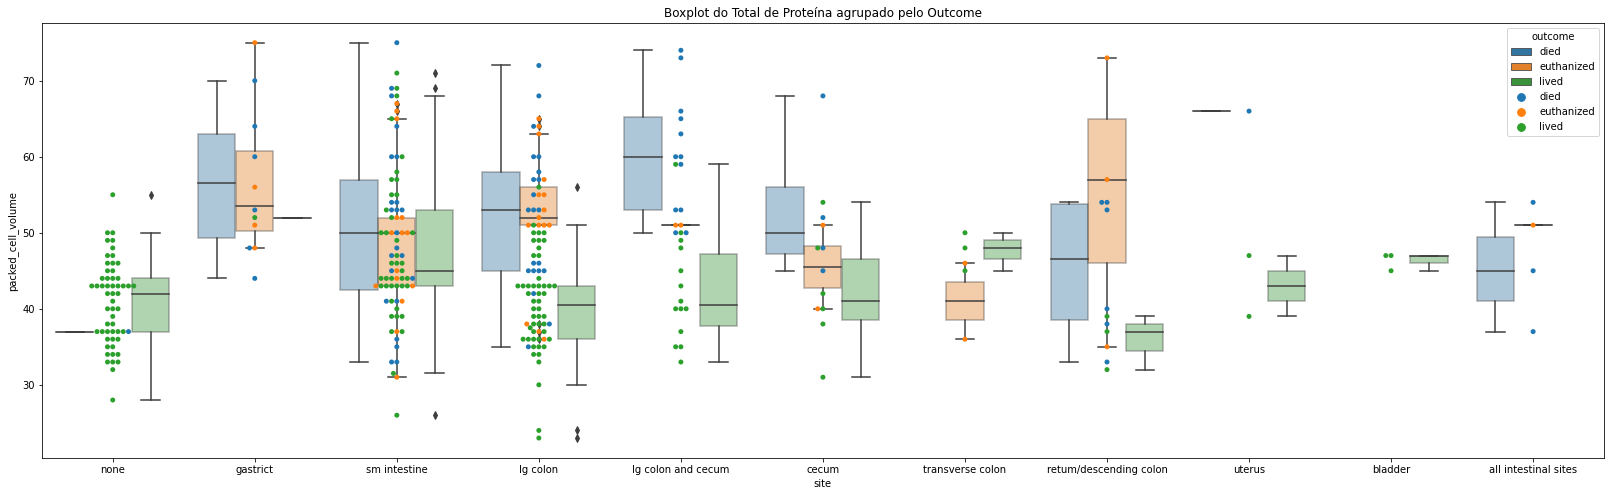

In [87]:
# box plot do total de proteína

plt.figure(figsize = (28,8))
ax = sns.boxplot(x='site',y='packed_cell_volume', hue='outcome', data = analysis_df, boxprops=dict(alpha=.4))
sns.swarmplot(x='site',y='packed_cell_volume', hue='outcome', data = analysis_df)
#ax.set_xticklabels(ax.get_xticklabels(), rotation= 0)
ax.set_xticklabels(site_list, rotation= 0)
plt.title('Boxplot do Total de Proteína agrupado pelo Outcome')
plt.show()

/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 12.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


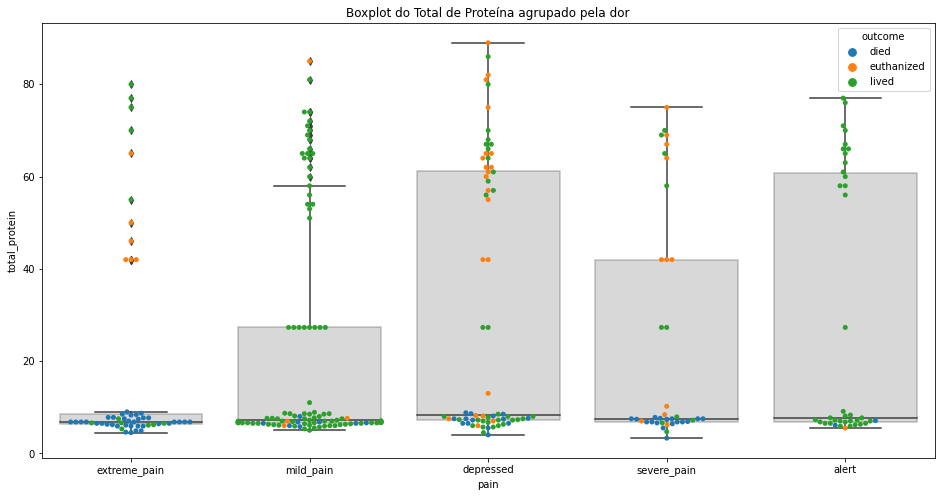

In [88]:
# box plot do total de proteína

plt.figure(figsize = (16,8))
ax = sns.boxplot(x='pain',y='total_protein', data = analysis_df, boxprops=dict(alpha=.3, facecolor='gray'))
ax.set_xticklabels(ax.get_xticklabels(), rotation= 0)
sns.swarmplot(x='pain',y='total_protein', hue='outcome', data = analysis_df)
plt.title('Boxplot do Total de Proteína agrupado pela dor')
plt.show()

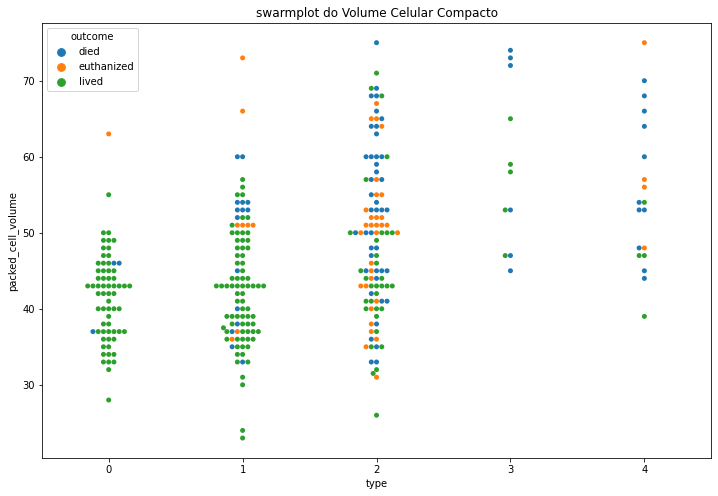

In [89]:
# swarmplot do Volume Celular Compacto

plt.figure(figsize = (12,8))
ax = sns.swarmplot(x='type',y='packed_cell_volume', hue='outcome', data = analysis_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation= 0)
plt.title('swarmplot do Volume Celular Compacto')
plt.show()

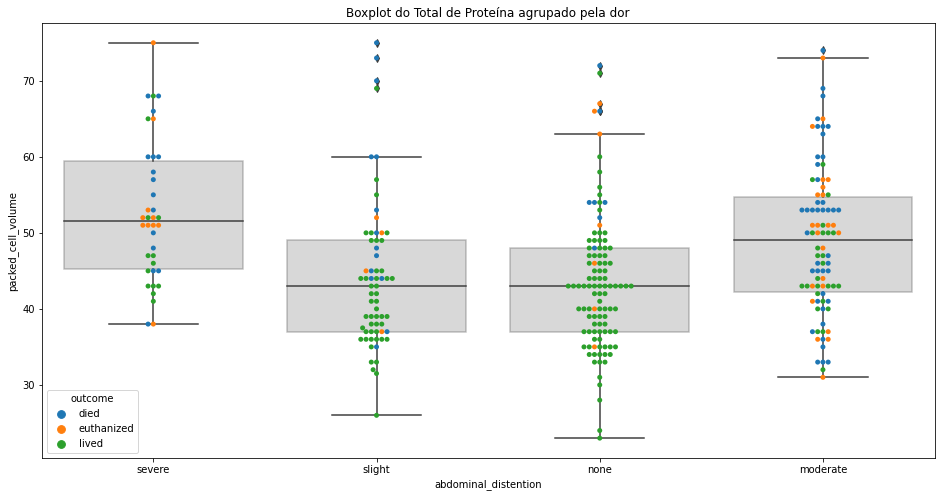

In [90]:
# box plot do total de proteína

plt.figure(figsize = (16,8))
ax = sns.boxplot(x='abdominal_distention',y='packed_cell_volume', data = analysis_df, boxprops=dict(alpha=.3, facecolor='gray'))
ax.set_xticklabels(ax.get_xticklabels(), rotation= 0)
sns.swarmplot(x='abdominal_distention',y='packed_cell_volume', hue='outcome', data = analysis_df)
plt.title('Boxplot do Total de Proteína agrupado pela dor')
plt.show()

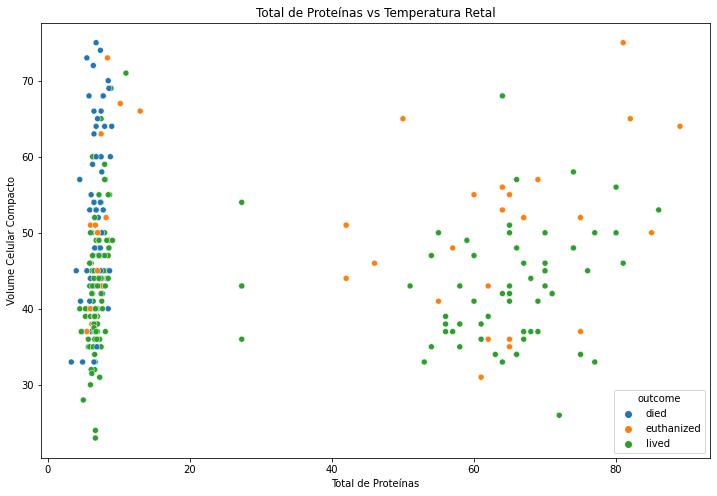

In [91]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=analysis_df, x='total_protein', y='packed_cell_volume', hue='outcome')
plt.title('Total de Proteínas vs Temperatura Retal')
plt.xlabel('Total de Proteínas')
plt.ylabel('Volume Celular Compacto')
plt.show()

Houve um entendimento que existe um forte indicativo que o total de proteínas e o volume celular compacto determinam os animais que sobrevivem

In [92]:
analysis_df.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,capillary_refill_time,pain,peristalsis,abdominal_distention,...,total_protein,outcome,surgical_lesion,cp_data,brightness,color,site,type,subtype,code
0,no,adult,38.5,66.0,28.0,cool,more_3_sec,extreme_pain,absent,severe,...,8.4,died,no,no,pale,pink,11,3,0,0
1,yes,adult,39.2,88.0,20.0,cool,less_3_sec,mild_pain,absent,slight,...,85.0,euthanized,no,no,pale,cyanotic,2,2,0,8
2,no,adult,38.3,40.0,24.0,normal,less_3_sec,mild_pain,hypomotile,none,...,6.7,lived,no,yes,pale,pink,0,0,0,0
3,yes,young,39.1,164.0,84.0,cold,more_3_sec,depressed,absent,severe,...,7.2,died,yes,yes,dark,cyanotic,2,2,0,8
4,no,adult,37.3,104.0,35.0,cool,more_3_sec,extreme_pain,hypomotile,moderate,...,7.4,died,no,no,dark,cyanotic,4,3,0,0


**Codificando os dados**

Nesta estapa transformamos os dados com resultado de eutanásia para morte, pois os dados poucos dados com resultado eutanásia e o final os animais estão mortos.

In [94]:
outcome_encoding = {
                        'lived': 0,
                        'died': 1,
                        'euthanized': 1
                    }

surgery_enconding = {
                        'no': 0,
                        'yes': 1
                    }

age_enconding = {
                    'adult': 0,
                    'young': 1
                }

temp_ext_enconding = {
                        'normal': 0,
                        'warm': 1,
                        'cool': 2,
                        'cold': 3
                        }

peripheral_pulse_enconding = {
                                'normal': 0,
                                'reduced': 1,
                                'absent': 2,
                                'increased': 3
                            }

refill_time_enconding = {
                            'less_3_sec': 0,
                            '3': 1,
                            'more_3_sec': 2
                        }

pain_encoding = {
                    'alert': 0,
                    'depressed': 1,
                    'mild_pain': 2,
                    'severe_pain': 3,
                    'extreme_pain': 4
                }

peristalsis_enconding = {
                            'normal': 0,
                            'hypomotile': 1,
                            'absent': 2,
                            'hypermotile': 3
}

surgical_lesion_enconding = {
                                'no': 0,
                                'yes': 1
                            }

cp_data_enconding = {
                        'no': 0,
                        'yes': 1
                    }

In [95]:
# codificando

df_data['outcome'].replace(outcome_encoding, inplace=True)
df_data['surgery'].replace(surgery_enconding, inplace=True)
df_data['age'].replace(age_enconding, inplace=True)
df_data['surgical_lesion'].replace(surgical_lesion_enconding, inplace=True)
df_data['cp_data'].replace(cp_data_enconding, inplace=True)

horse_test_df['outcome'].replace(outcome_encoding, inplace=True)
horse_test_df['surgery'].replace(surgery_enconding, inplace=True)
horse_test_df['age'].replace(age_enconding, inplace=True)
horse_test_df['surgical_lesion'].replace(surgical_lesion_enconding, inplace=True)
horse_test_df['cp_data'].replace(cp_data_enconding, inplace=True)


#df_data['temp_of_extremities'].replace(temp_ext_enconding, inplace=True)
#df_data['peripheral_pulse'].replace(peripheral_pulse_enconding, inplace=True)
#df_data['capillary_refill_time'].replace(refill_time_enconding, inplace=True)
#df_data['pain'].replace(pain_encoding, inplace=True)
#df_data['peristalsis'].replace(peristalsis_enconding, inplace=True)

df_data.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,capillary_refill_time,pain,peristalsis,...,total_protein,outcome,surgical_lesion,cp_data,brightness,color,site,type,subtype,code
0,0,0,530101,38.5,66.0,28.0,cool,more_3_sec,extreme_pain,absent,...,8.4,1,0,0,pale,pink,11,3,0,0
1,1,0,534817,39.2,88.0,20.0,cool,less_3_sec,mild_pain,absent,...,85.0,1,0,0,pale,cyanotic,2,2,0,8
2,0,0,530334,38.3,40.0,24.0,normal,less_3_sec,mild_pain,hypomotile,...,6.7,0,0,1,pale,pink,0,0,0,0
3,1,1,5290409,39.1,164.0,84.0,cold,more_3_sec,depressed,absent,...,7.2,1,1,1,dark,cyanotic,2,2,0,8
4,0,0,530255,37.3,104.0,35.0,cool,more_3_sec,extreme_pain,hypomotile,...,7.4,1,0,0,dark,cyanotic,4,3,0,0


In [96]:
horse_test_df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,capillary_refill_time,pain,peristalsis,...,total_protein,outcome,surgical_lesion,cp_data,brightness,color,site,type,subtype,code
0,0,0,1,37.3,104.0,35.0,cool,more_3_sec,extreme_pain,hypomotile,...,7.4,1,0,0,dark,cyanotic,4,3,0,0
1,0,0,2,39.1,72.0,52.0,warm,less_3_sec,depressed,hypermotile,...,7.8,0,1,0,bright,pink,2,1,1,1
2,1,0,3,37.2,42.0,12.0,warm,less_3_sec,mild_pain,hypomotile,...,7.0,0,0,0,normal,pink,4,1,2,4
3,0,1,4,38.0,92.0,28.0,normal,less_3_sec,alert,hypomotile,...,6.1,1,0,1,bright,pink,0,0,0,0
4,1,0,5,37.6,64.0,21.0,normal,less_3_sec,depressed,hypomotile,...,7.0,0,1,1,bright,pink,4,2,0,5


In [97]:
df_data.select_dtypes('object').columns

Index(['temp_of_extremities', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'brightness', 'color'],
      dtype='object')

In [98]:
df_data = df_data.merge(pd.get_dummies(df_data['temp_of_extremities'], prefix='temp_ext'), left_index=True, right_index=True)
df_data = df_data.merge(pd.get_dummies(df_data['capillary_refill_time'], prefix='crt'), left_index=True, right_index=True)
df_data = df_data.merge(pd.get_dummies(df_data['pain'], prefix='pain'), left_index=True, right_index=True)
df_data = df_data.merge(pd.get_dummies(df_data['peristalsis'], prefix='peristalsis'), left_index=True, right_index=True)
df_data = df_data.merge(pd.get_dummies(df_data['abdominal_distention'], prefix='abdominal_distention'), left_index=True, right_index=True)
df_data = df_data.merge(pd.get_dummies(df_data['brightness'], prefix='brightness'), left_index=True, right_index=True)
df_data = df_data.merge(pd.get_dummies(df_data['color'], prefix='color'), left_index=True, right_index=True)
df_data.drop(df_data.select_dtypes('object').columns, axis=1, inplace=True)
df_data.head()


,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,outcome,surgical_lesion,...,abdominal_distention_none,abdominal_distention_severe,abdominal_distention_slight,brightness_bright,brightness_dark,brightness_normal,brightness_pale,color_cyanotic,color_pink,color_red
0,0,0,530101,38.5,66.0,28.0,45.0,8.4,1,0,...,0,1,0,0,0,0,1,0,1,0
1,1,0,534817,39.2,88.0,20.0,50.0,85.0,1,0,...,0,0,1,0,0,0,1,1,0,0
2,0,0,530334,38.3,40.0,24.0,33.0,6.7,0,0,...,1,0,0,0,0,0,1,0,1,0
3,1,1,5290409,39.1,164.0,84.0,48.0,7.2,1,1,...,0,1,0,0,1,0,0,1,0,0
4,0,0,530255,37.3,104.0,35.0,74.0,7.4,1,0,...,0,0,0,0,1,0,0,1,0,0


In [99]:
horse_test_df = horse_test_df.merge(pd.get_dummies(horse_test_df['temp_of_extremities'], prefix='temp_ext'), left_index=True, right_index=True)
horse_test_df = horse_test_df.merge(pd.get_dummies(horse_test_df['capillary_refill_time'], prefix='crt'), left_index=True, right_index=True)
horse_test_df = horse_test_df.merge(pd.get_dummies(horse_test_df['pain'], prefix='pain'), left_index=True, right_index=True)
horse_test_df = horse_test_df.merge(pd.get_dummies(horse_test_df['peristalsis'], prefix='peristalsis'), left_index=True, right_index=True)
horse_test_df = horse_test_df.merge(pd.get_dummies(horse_test_df['abdominal_distention'], prefix='abdominal_distention'), left_index=True, right_index=True)
horse_test_df = horse_test_df.merge(pd.get_dummies(horse_test_df['brightness'], prefix='brightness'), left_index=True, right_index=True)
horse_test_df = horse_test_df.merge(pd.get_dummies(horse_test_df['color'], prefix='color'), left_index=True, right_index=True)
horse_test_df.drop(horse_test_df.select_dtypes('object').columns, axis=1, inplace=True)
horse_test_df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,outcome,surgical_lesion,...,abdominal_distention_none,abdominal_distention_severe,abdominal_distention_slight,brightness_bright,brightness_dark,brightness_normal,brightness_pale,color_cyanotic,color_pink,color_red
0,0,0,1,37.3,104.0,35.0,74.0,7.4,1,0,...,0,0,0,0,1,0,0,1,0,0
1,0,0,2,39.1,72.0,52.0,50.0,7.8,0,1,...,0,0,1,1,0,0,0,0,1,0
2,1,0,3,37.2,42.0,12.0,43.0,7.0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,1,4,38.0,92.0,28.0,37.0,6.1,1,0,...,0,0,1,1,0,0,0,0,1,0
4,1,0,5,37.6,64.0,21.0,40.0,7.0,0,1,...,1,0,0,1,0,0,0,0,1,0


In [100]:
df_data.drop('hospital_number', axis=1, inplace=True)
horse_test_df.drop('hospital_number', axis=1, inplace=True)

In [86]:
df_data.to_csv('cleaned_horse.csv')
horse_test_df.to_csv('cleaned_horse_test.csv')

## Machine Learning

In [101]:
# Criando os df de treino e teste

X_train = df_data.loc[:,df_data.columns != 'outcome']  # Entrada
y_train = df_data.outcome    # Saída

X_test = horse_test_df.loc[:,df_data.columns != 'outcome'] 
y_test = horse_test_df.outcome

### Modelo KNN

In [102]:
# treinar modelo
from sklearn.neighbors import KNeighborsClassifier

def train(X_train, y_train, n_neighbors=5):
  model = KNeighborsClassifier(n_neighbors=n_neighbors)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)  # inferência do teste

  return model, y_pred

model, y_pred = train(X_train, y_train)

Acurácia:  0.8202247191011236
Kappa:  0.6301298701298701
F1:  0.8209255063187648


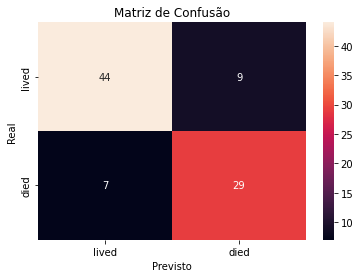

In [103]:
def evaluate(y_test, y_pred):  

  # Acurácia
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_test, y_pred)
  print('Acurácia: ', accuracy)

  # Kappa
  from sklearn.metrics import cohen_kappa_score
  kappa = cohen_kappa_score(y_test, y_pred)
  print('Kappa: ', kappa)

  # F1
  from sklearn.metrics import f1_score
  f1 = f1_score(y_test, y_pred, average='weighted')
  print('F1: ', f1)

  # Matriz de confusão
  from sklearn.metrics import confusion_matrix
  confMatrix = confusion_matrix(y_test, y_pred)

  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f")
  plt.ylabel('Real')
  plt.xlabel('Previsto')
  plt.title('Matriz de Confusão')

  # Colocar os nomes
  ax.xaxis.set_ticklabels(['lived', 'died']) 
  ax.yaxis.set_ticklabels(['lived', 'died'])
  plt.show()

evaluate(y_test, y_pred)

**Normalizando dados**

In [104]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Acurácia:  0.8651685393258427
Kappa:  0.7150480256136607
F1:  0.8636543892327105


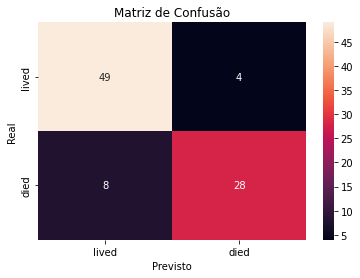

In [105]:
# Treinar e Testar novamente
model, y_pred = train(X_train, y_train)
evaluate(y_test, y_pred)

In [106]:
# KNN - Grid Search

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Parâmetros a serem testados
tuned_parameters = [{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
                     'weights': ['uniform', 'distance'],
                     'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                     'leaf_size': [10, 20, 30, 40, 50 , 60, 70, 80],
                    }]

# Executar o grid search
model = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring='f1_weighted')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [107]:
model.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 10,
 'n_neighbors': 23,
 'weights': 'distance'}

Acurácia:  1.0
Kappa:  1.0
F1:  1.0


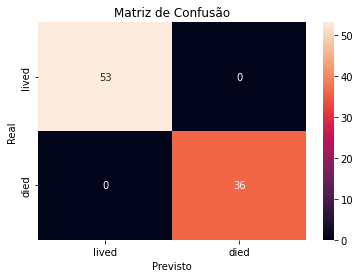

In [108]:
evaluate(y_test, y_pred)

### RandomForest

In [127]:
# treinar modelo
from sklearn.ensemble import RandomForestClassifier

def train(X_train, y_train, seed):
  model = RandomForestClassifier(min_samples_leaf=2, max_depth=10, max_leaf_nodes=100, criterion='gini', random_state=seed)
  model.fit(X_train, y_train);
  return model

model = train(X_train, y_train, seed)

Resultados de Treino
Acurácia:  0.9665551839464883
Kappa:  0.9309532606687604
F1:  0.959349593495935


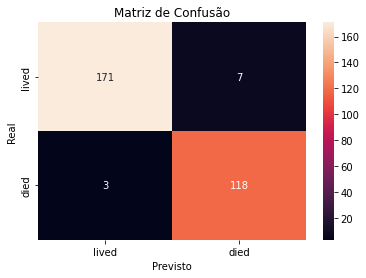

Resultados de Teste
Acurácia:  0.9550561797752809
Kappa:  0.9058699101004759
F1:  0.9428571428571428


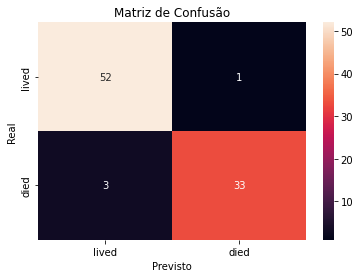

In [128]:
def predict_and_evaluate(model, X_test, y_test):

  y_pred = model.predict(X_test) # inferência do teste

  # Acurácia
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_test, y_pred)
  print('Acurácia: ', accuracy)

  # Kappa
  from sklearn.metrics import cohen_kappa_score
  kappa = cohen_kappa_score(y_test, y_pred)
  print('Kappa: ', kappa)

  # F1
  from sklearn.metrics import f1_score
  f1 = f1_score(y_test, y_pred)
  print('F1: ', f1)

  # Matriz de confusão
  from sklearn.metrics import confusion_matrix
  confMatrix = confusion_matrix(y_test, y_pred)

  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f")
  plt.xlabel('Previsto')
  plt.ylabel('Real')
  plt.title('Matriz de Confusão')

  # Colocar os nomes
  ax.xaxis.set_ticklabels(['lived', 'died']) 
  ax.yaxis.set_ticklabels(['lived', 'died'])
  plt.show()

print('Resultados de Treino')
predict_and_evaluate(model, X_train, y_train)
print('Resultados de Teste')
predict_and_evaluate(model, X_test, y_test)

In [190]:
# Grid Search

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Parâmetros a serem testados
tuned_parameters = [{'min_samples_leaf': [2, 3, 4],
                     'max_depth': [10, 20, 40, 80, 100],
                     'n_estimators': [5, 10, 50, 70, 100],
                     'criterion': ['gini', 'entropy'],
                     'max_features': ['sqrt', 'log2']
                     }]

# Executar o grid search
model = GridSearchCV(RandomForestClassifier(), tuned_parameters, scoring='f1_weighted', n_jobs=4)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [191]:
model.best_params_

{'criterion': 'entropy',
 'max_depth': 80,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'n_estimators': 50}

Acurácia:  0.9550561797752809
Kappa:  0.9067085953878407
F1:  0.9550561797752809


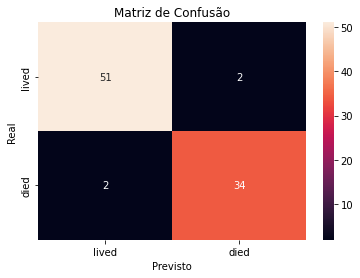

In [192]:
evaluate(y_test, y_pred)

### Modelo Decision Tree

In [193]:
# treinar modelo
from sklearn.tree import DecisionTreeClassifier

def train(X_train, y_train, seed):
  model = DecisionTreeClassifier(random_state=seed,
                                  max_depth=15,
                                  criterion='gini',
                                  min_samples_leaf=2) # tente mudar parâmetro para evitar overfitting
  model.fit(X_train, y_train);
  return model

model = train(X_train, y_train, seed)

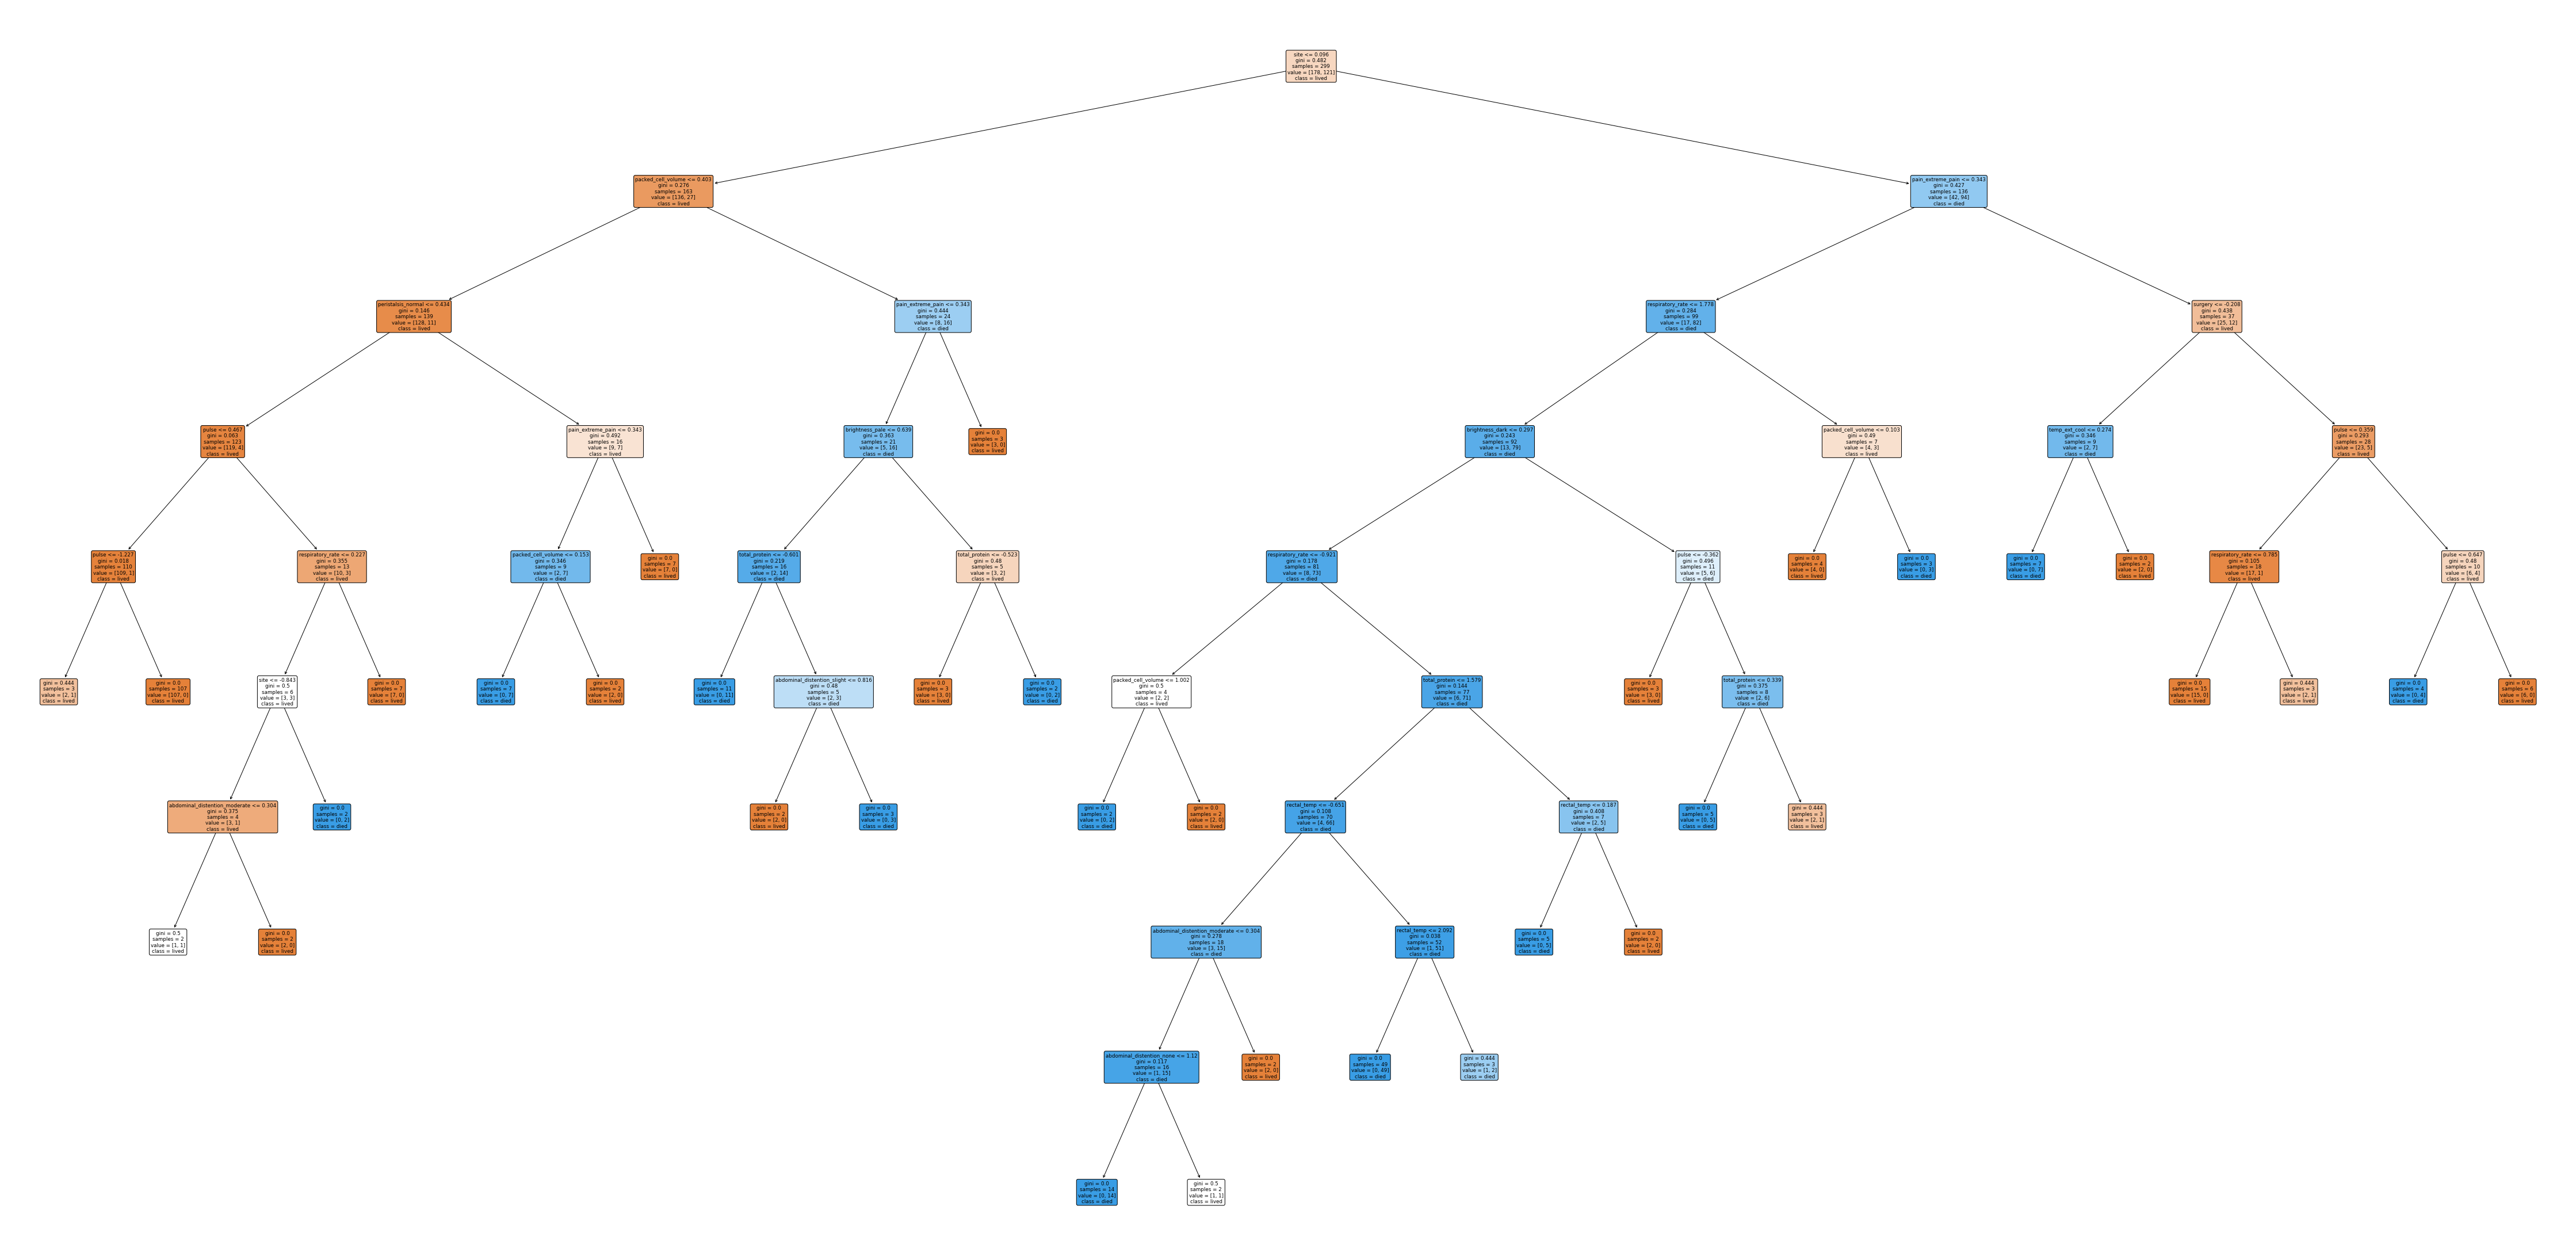

In [194]:
# Visualização gráfica da árvore de decisão
from sklearn.tree import plot_tree
plt.subplots(figsize=(80, 40)) # Definir tamanho da imagem a ser gerada
plot_tree(model, class_names=['lived', 'died'], feature_names=df_data.columns,
               filled=True, rounded=True); # plota a árvore

plt.savefig('decision_tree.png') # Salva a imagem

Resultados de Treino
Acurácia:  0.979933110367893
Kappa:  0.9581310679611651
F1:  0.9747899159663866


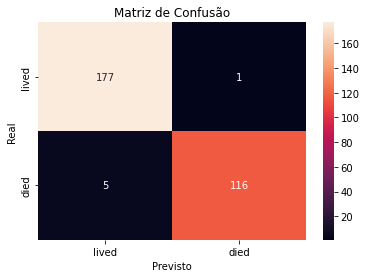

Resultados de Teste
Acurácia:  0.9550561797752809
Kappa:  0.9050160085378869
F1:  0.9411764705882353


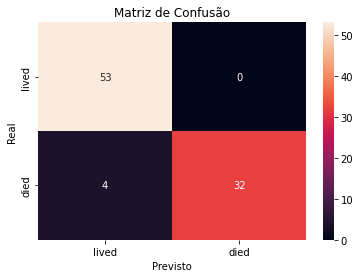

In [195]:
# Avaliando o Modelo DecisionTree

print('Resultados de Treino')
predict_and_evaluate(model, X_train, y_train)
print('Resultados de Teste')
predict_and_evaluate(model, X_test, y_test)

In [232]:
# Grid Search para Decision Tree

from sklearn.model_selection import GridSearchCV

# Definir parâmetros a serem utilizados


tuned_parameters = [{
                     'criterion': ['gini', 'entropy'], 
                     'max_depth': [10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 40, 50, 60, 80, 100],
                     'splitter': ['best', 'random'],
                     'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
                     }]

# Executar o grid search
model = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring='f1_weighted', n_jobs=2)
model.fit(X_train, y_train);

In [233]:
model.best_params_

{'criterion': 'entropy',
 'max_depth': 16,
 'min_samples_leaf': 4,
 'splitter': 'random'}

Resultados de Treino
Acurácia:  0.9163879598662207
Kappa:  0.8239063346604161
F1:  0.8917748917748918


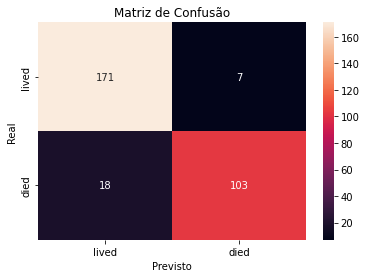

Resultados de Teste
Acurácia:  0.8651685393258427
Kappa:  0.7070762479429512
F1:  0.8064516129032258


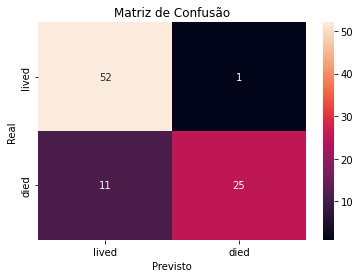

In [234]:
# reavaliando o modelo

print('Resultados de Treino')
predict_and_evaluate(model, X_train, y_train)
print('Resultados de Teste')
predict_and_evaluate(model, X_test, y_test)

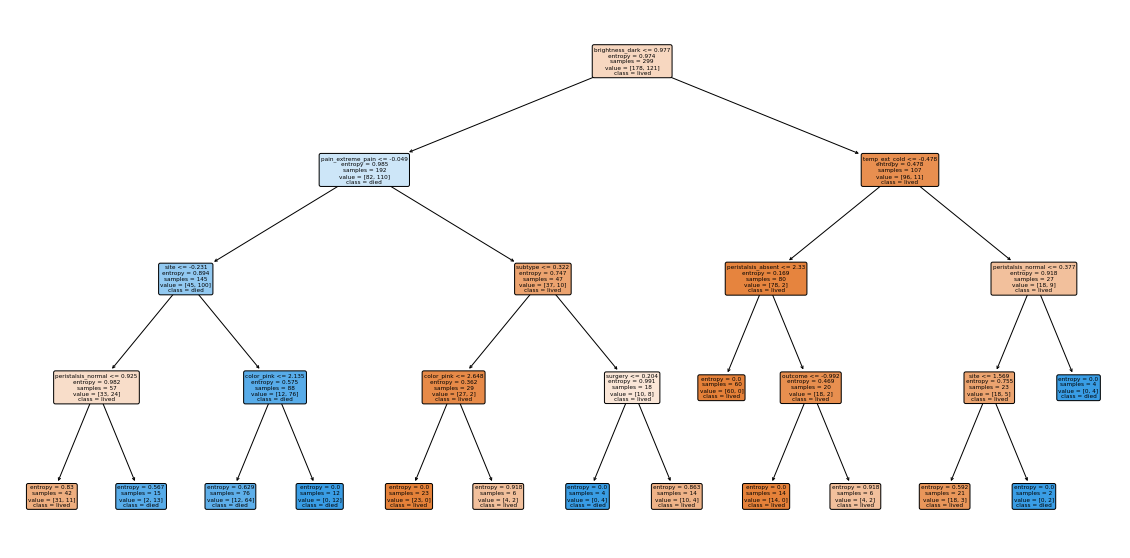

In [134]:
# Visualização gráfica da árvore de decisão
plt.subplots(figsize=(20, 10)) # Definir tamanho da imagem a ser gerada
plot_tree(model.best_estimator_, class_names=['lived', 'died'], 
               filled=True, rounded=True, feature_names=df_data.columns);

plt.savefig('tree_final.png') # Salva a imagem

## Modelo GradientBoostingClassifier

In [235]:
# treinar modelo
from sklearn.ensemble import GradientBoostingClassifier

def train(X_train, y_train, seed):
  model = GradientBoostingClassifier(random_state=seed,
                                  min_samples_leaf=2)
  model.fit(X_train, y_train);
  return model

model = train(X_train, y_train, seed)

Resultados de Treino
Acurácia:  1.0
Kappa:  1.0
F1:  1.0


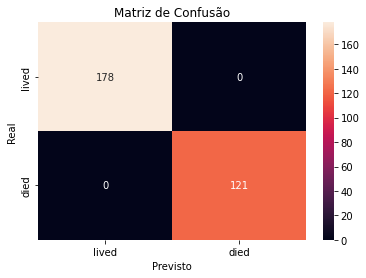

Resultados de Teste
Acurácia:  1.0
Kappa:  1.0
F1:  1.0


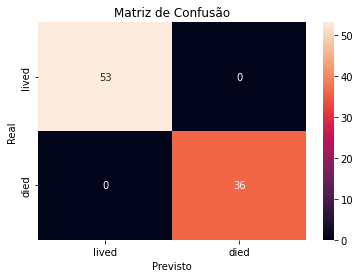

In [236]:
# Avaliando o Modelo GradientBoostingClassifier

print('Resultados de Treino')
predict_and_evaluate(model, X_train, y_train)
print('Resultados de Teste')
predict_and_evaluate(model, X_test, y_test)

In [245]:
# treinar modelo
from xgboost import XGBClassifier

def train(X_train, y_train, seed):
  model = XGBClassifier(random_state=seed,
                        n_estimators=100,
                        max_depth=10)                        
  model.fit(X_train, y_train);
  return model

model = train(X_train, y_train, seed)

Resultados de Treino
Acurácia:  1.0
Kappa:  1.0
F1:  1.0


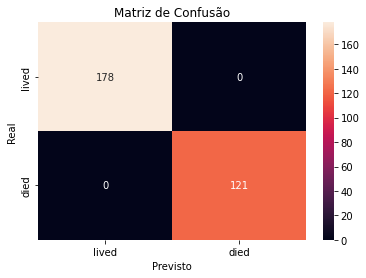

Resultados de Teste
Acurácia:  1.0
Kappa:  1.0
F1:  1.0


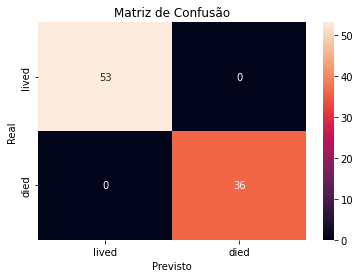

In [246]:
# Avaliando o Modelo GradientBoostingClassifier

print('Resultados de Treino')
predict_and_evaluate(model, X_train, y_train)
print('Resultados de Teste')
predict_and_evaluate(model, X_test, y_test)

# Conclusão

Com o saneamento adotado e a exclusão das features com mais de 20% de dados faltando o grupo de estudo conseguiu chegar a três modelos que obteve 100% de precisão na classificação dos dados em teste após normalização dos dados através da biclioteca StandardScaler:

* KNN: 100%

* RandomForest: 95,5%

* Decision Tree: 95,5%

* GradientBoostingClassifier: 100%

* XGBoostingClassifier: 100%
